In [28]:
# Phase 2: yfinance API
# Objective: Map out all the data points. `yfinance` provides asset like SPY.
# 1. Fix the `data_pipeline.py` Bug: First, let's implement the fix for the `TypeError` we discovered.
# 2. Explore the Ticker Object: We will then systematically call every method on the `yf.Ticker('SPY')` object to see the full range of available data, including financials, corporate actions, news, and more.

In [29]:
import yfinance as yf
import pandas as pd
import logging

logging.basicConfig(level=logging.INFO, format = '%(asctime)s - %(levelname)s - %(message)s')

class PatchedLiveDataHandler:
    def __init__(self, ticker: str = "SPY"):
        self.ticker = ticker
        self.tk = yf.Ticker(self.ticker)
        self.data = None
        
    def fetch_data(self, period: str = "5y", interval: str = "1d") -> pd.DataFrame:
        logging.info(f"Fetching {period} of {interval} data for {self.ticker}...")
        self.data = self.tk.history(period=period, interval=interval, auto_adjust = False)
        if self.data.empty:
            logging.error(f"No data fetched for ticker {self.ticker}.")
            return pd.DataFrame()
        
        self.data.columns = [str(col).lower().replace(' ', '_') for col in self.data.columns]
        logging.info(f"Equity data fetched. Shape: {self.data.shape}")
        return self.data


In [30]:
# Prove the fix works"
live_pipeline = PatchedLiveDataHandler(ticker="SPY")
live_data_raw = live_pipeline.fetch_data(period="1y")
print("Successfully fetched data using the patched handler:")
print(live_data_raw.head())

2025-10-03 14:48:01,556 - INFO - Fetching 1y of 1d data for SPY...
2025-10-03 14:48:01,764 - INFO - Equity data fetched. Shape: (251, 9)


Successfully fetched data using the patched handler:
                                 open        high         low       close  \
Date                                                                        
2024-10-03 00:00:00-04:00  567.359985  569.799988  565.489990  567.820007   
2024-10-04 00:00:00-04:00  572.349976  573.359985  568.099976  572.979980   
2024-10-07 00:00:00-04:00  571.299988  571.960022  566.630005  567.799988   
2024-10-08 00:00:00-04:00  570.419983  573.780029  569.530029  573.169983   
2024-10-09 00:00:00-04:00  573.159973  577.710022  572.549988  577.140015   

                            adj_close    volume  dividends  stock_splits  \
Date                                                                       
2024-10-03 00:00:00-04:00  560.999634  40846500        0.0           0.0   
2024-10-04 00:00:00-04:00  566.097595  42939100        0.0           0.0   
2024-10-07 00:00:00-04:00  560.979858  49964700        0.0           0.0   
2024-10-08 00:00:00-04:00  

In [31]:
spy = yf.Ticker('SPY') 

# Systematically explore and print all available data points
print("--- Ticker Info ---")
print(spy.info)

print("--- Actions (Dividends, Splits) ---")
print(spy.actions.head())

print("--- Financials ---")
print(spy.financials)

print("--- Major Holders ---")
print(spy.major_holders)

print("--- Institutional Holders ---")
print(spy.institutional_holders.head())

print("--- Balance Sheet ---")
print(spy.balance_sheet)

print("--- Cashflow ---")
print(spy.cashflow)

print("--- Earnings ---")
print(spy.earnings)

print("--- Analyst Recommendations ---")
print(spy.recommendations.tail())

print("--- Calendar (Upcoming Events) ---")
print(spy.calendar)

print("--- News ---")
for news_item in spy.news[:5]: # Print first 5 news items
    print(f"- {news_item['title']}")

--- Ticker Info ---
{'longBusinessSummary': 'The trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index, with the weight of each stock in the portfolio substantially corresponding to the weight of such stock in the index.', 'companyOfficers': [], 'executiveTeam': [], 'maxAge': 86400, 'priceHint': 2, 'previousClose': 669.22, 'open': 669.99, 'dayLow': 668.17, 'dayHigh': 672.675, 'regularMarketPreviousClose': 669.22, 'regularMarketOpen': 669.99, 'regularMarketDayLow': 668.17, 'regularMarketDayHigh': 672.675, 'trailingPE': 28.298445, 'volume': 58755205, 'regularMarketVolume': 58755205, 'averageVolume': 70666985, 'averageVolume10days': 76515690, 'averageDailyVolume10Day': 76515690, 'bid': 669.67, 'ask': 669.68, 'bidSize': 6, 'askSize': 11, 'yield': 0.0111, 'totalAssets': 654797701120, 'fiftyTwoWeekLow': 481.8, 'fiftyTwoWeekHigh': 672.675, 'allTimeHigh': 670.57, 'allTimeLow': 42.8125, 'fiftyDayAverage': 647.3382, 'twoHundred

2025-10-03 14:48:04,564 - ERROR - HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"No fundamentals data found for symbol: SPY"}}}
c:\Users\md\Downloads\Kaggle\hull-tactical-market-prediction\venv\Lib\site-packages\yfinance\scrapers\fundamentals.py:36: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


Empty DataFrame
Columns: []
Index: []
--- Institutional Holders ---
Empty DataFrame
Columns: []
Index: []
--- Balance Sheet ---
Empty DataFrame
Columns: []
Index: []
--- Cashflow ---
Empty DataFrame
Columns: []
Index: []
--- Earnings ---
None
--- Analyst Recommendations ---


2025-10-03 14:48:04,828 - ERROR - HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"No fundamentals data found for symbol: SPY"}}}


Empty DataFrame
Columns: []
Index: []
--- Calendar (Upcoming Events) ---


2025-10-03 14:48:05,122 - ERROR - HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"No fundamentals data found for symbol: SPY"}}}


{}
--- News ---


KeyError: 'title'

In [32]:
spy.live()

2025-10-03 14:48:08,434 - INFO - Connected to WebSocket.
2025-10-03 14:48:08,436 - INFO - Subscribed to symbols: ['SPY']
2025-10-03 14:48:08,436 - INFO - Listening for messages...


Connected to WebSocket.
Subscribed to symbols: ['SPY']
Listening for messages...
{'id': 'SPY', 'price': 669.96, 'time': '1759520887000', 'exchange': 'PCX', 'quote_type': 20, 'market_hours': 1, 'change_percent': 0.110584155, 'day_volume': '58804347', 'change': 0.74005127, 'price_hint': '2'}
{'id': 'SPY', 'price': 669.96, 'time': '1759520887000', 'exchange': 'PCX', 'quote_type': 20, 'market_hours': 1, 'change_percent': 0.110584155, 'day_volume': '58804477', 'change': 0.74005127, 'price_hint': '2'}
{'id': 'SPY', 'price': 669.9739, 'time': '1759520889000', 'exchange': 'PCX', 'quote_type': 20, 'market_hours': 1, 'change_percent': 0.11265448, 'day_volume': '58805717', 'change': 0.75390625, 'last_size': '150', 'price_hint': '2'}
{'id': 'SPY', 'price': 669.99, 'time': '1759520891000', 'exchange': 'PCX', 'quote_type': 20, 'market_hours': 1, 'change_percent': 0.115062244, 'day_volume': '58811343', 'change': 0.77001953, 'last_size': '100', 'price_hint': '2'}
{'id': 'SPY', 'price': 669.975, 'time'

2025-10-03 14:48:20,261 - INFO - WebSocket connection closed.


Received keyboard interrupt.
WebSocket connection closed.


In [33]:
nvda = yf.Ticker('NVDA') # to test, we used ticker `NVDA` as `SPY` would not have certain details like individual stock ticker does.

# Systematically explore and print all available data points
print("--- Ticker Info ---")
print(nvda.info)

print("--- Actions (Dividends, Splits) ---")
print(nvda.actions.head())

print("--- Financials ---")
print(nvda.financials)

print("--- Major Holders ---")
print(nvda.major_holders)

print("--- Institutional Holders ---")
print(nvda.institutional_holders.head())

print("--- Balance Sheet ---")
print(nvda.balance_sheet)

print("--- Cashflow ---")
print(nvda.cashflow)

print("--- Earnings ---")
print(nvda.earnings)

print("--- Analyst Recommendations ---")
print(nvda.recommendations.tail())

print("--- Calendar (Upcoming Events) ---")
print(nvda.calendar)

print("--- News ---")
for news_item in nvda.news[:5]: # Print first 5 news items
    print(f"- {news_item['title']}")

--- Ticker Info ---
{'address1': '2788 San Tomas Expressway', 'city': 'Santa Clara', 'state': 'CA', 'zip': '95051', 'country': 'United States', 'phone': '408 486 2000', 'website': 'https://www.nvidia.com', 'industry': 'Semiconductors', 'industryKey': 'semiconductors', 'industryDisp': 'Semiconductors', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': "NVIDIA Corporation, a computing infrastructure company, provides graphics and compute and networking solutions in the United States, Singapore, Taiwan, China, Hong Kong, and internationally. The Compute & Networking segment includes its Data Centre accelerated computing platforms and artificial intelligence solutions and software; networking; automotive platforms and autonomous and electric vehicle solutions; Jetson for robotics and other embedded platforms; and DGX Cloud computing services. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming servi

c:\Users\md\Downloads\Kaggle\hull-tactical-market-prediction\venv\Lib\site-packages\yfinance\scrapers\fundamentals.py:36: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


  period  strongBuy  buy  hold  sell  strongSell
0     0m         11   47     4     1           0
1    -1m         11   48     4     1           0
2    -2m         11   47     6     1           0
3    -3m         11   48     6     1           0
--- Calendar (Upcoming Events) ---
{'Dividend Date': datetime.date(2025, 10, 1), 'Ex-Dividend Date': datetime.date(2025, 9, 10), 'Earnings Date': [datetime.date(2025, 11, 19)], 'Earnings High': 1.34, 'Earnings Low': 1.14, 'Earnings Average': 1.24214, 'Revenue High': 58340000000, 'Revenue Low': 53461000000, 'Revenue Average': 54603117970}
--- News ---


KeyError: 'title'

In [34]:
nvda.live()

2025-10-03 14:48:25,540 - INFO - Connected to WebSocket.
2025-10-03 14:48:25,541 - INFO - Subscribed to symbols: ['NVDA']
2025-10-03 14:48:25,542 - INFO - Listening for messages...


Connected to WebSocket.
Subscribed to symbols: ['NVDA']
Listening for messages...
{'id': 'NVDA', 'price': 187.73, 'time': '1759520905000', 'exchange': 'NMS', 'quote_type': 8, 'market_hours': 1, 'change_percent': -0.64041847, 'day_volume': '114092836', 'change': -1.2100067, 'last_size': '100', 'price_hint': '2'}
{'id': 'NVDA', 'price': 187.74, 'time': '1759520906000', 'exchange': 'NMS', 'quote_type': 8, 'market_hours': 1, 'change_percent': -0.63512063, 'day_volume': '114098010', 'change': -1.199997, 'last_size': '100', 'price_hint': '2'}
{'id': 'NVDA', 'price': 187.745, 'time': '1759520907000', 'exchange': 'NMS', 'quote_type': 8, 'market_hours': 1, 'change_percent': -0.6324798, 'day_volume': '114099119', 'change': -1.1950073, 'last_size': '1000', 'price_hint': '2'}
{'id': 'NVDA', 'price': 187.74, 'time': '1759520907000', 'exchange': 'NMS', 'quote_type': 8, 'market_hours': 1, 'change_percent': -0.63512063, 'day_volume': '114100796', 'change': -1.199997, 'last_size': '100', 'price_hint': 

2025-10-03 14:48:34,248 - INFO - WebSocket connection closed.


Received keyboard interrupt.
WebSocket connection closed.


#### Option Chains

In [35]:
nvda.option_chain(nvda.options[0])

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   NVDA251003C00050000 2025-10-03 19:03:09+00:00    50.0     137.55  137.20   
1   NVDA251003C00055000 2025-10-03 19:03:09+00:00    55.0     132.60  132.15   
2   NVDA251003C00060000 2025-10-02 16:41:08+00:00    60.0     126.95  126.95   
3   NVDA251003C00065000 2025-10-03 17:01:49+00:00    65.0     122.77  121.85   
4   NVDA251003C00070000 2025-10-03 17:00:45+00:00    70.0     118.02  116.30   
..                  ...                       ...     ...        ...     ...   
65  NVDA251003C00330000 2025-08-28 13:56:31+00:00   330.0       0.01    0.00   
66  NVDA251003C00340000 2025-08-27 14:33:42+00:00   340.0       0.02    0.00   
67  NVDA251003C00350000 2025-09-30 15:04:18+00:00   350.0       0.01    0.00   
68  NVDA251003C00355000 2025-10-01 15:05:33+00:00   355.0       0.01    0.00   
69  NVDA251003C00360000 2025-09-19 14:35:56+00:00   360.0       0.01    0.00   

       ask    change  per

In [36]:
# import libraries
import numpy as np
from scipy.stats import norm
from datetime import datetime

In [37]:
def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Black-Scholes option Greeks
    S: current stock price
    K: strike price
    T: time to expiration (in years)
    r: risk-free rate
    sigma: volatility
    option_type: 'call' or 'put'
    """
    
    if T <= 0:
        # Option expired
        if option_type == 'call':
            return {'delta': 0, 'gamma': 0, 'theta': 0, 'vega': 0, 'rho': 0}
        else:
            return {'delta': 0, 'gamma': 0, 'theta': 0, 'vega': 0, 'rho': 0}
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        delta = norm.cdf(d1)
        theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) 
                - r * K * np.exp(-r * T) * norm.cdf(d2)) / 365
        rho = K * T * np.exp(-r * T) * norm.cdf(d2) / 100
    else:  # put
        delta = norm.cdf(d1) - 1
        theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) 
                + r * K * np.exp(-r * T) * norm.cdf(-d2)) / 365
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2) / 100
    
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100
    
    return {
        'delta': delta,
        'gamma': gamma,
        'theta': theta,
        'vega': vega,
        'rho': rho
    }

In [38]:
def get_option_greeks(ticker_symbol, expiration_date=None):
    """
    Get option chain and calculate Greeks for a given ticker
    """
    # Get stock data
    stock = yf.Ticker(ticker_symbol)
    stock_info = stock.info
    
    # Current stock price
    S = stock_info.get('currentPrice', stock_info.get('regularMarketPrice', 0))
    if S == 0:
        hist = stock.history(period="1d")
        S = hist['Close'].iloc[-1]
    
    # Risk-free rate (using 10-year treasury as proxy)
    r = 0.0415  # 4.15%, you can update this with current rates
    
    # Get option chain
    if expiration_date:
        opt_chain = stock.option_chain(expiration_date)
    else:
        # Get next expiration if not specified
        opt_chain = stock.option_chain(stock.options[0])
    
    # Current date
    current_date = datetime.now()
    
    # Process calls
    calls = opt_chain.calls.copy()
    calls['Type'] = 'Call'
    
    # Process puts
    puts = opt_chain.puts.copy()
    puts['Type'] = 'Put'
    
    # Combine calls and puts
    options = pd.concat([calls, puts], ignore_index=True)
    
    # Calculate time to expiration in years
    expiration_datetime = datetime.strptime(expiration_date if expiration_date else stock.options[0], '%Y-%m-%d')
    T = (expiration_datetime - current_date).days / 365.25
    
    # Calculate implied volatility (using midpoint of bid-ask as rough estimate)
    options['midPrice'] = (options['bid'] + options['ask']) / 2
    
    # For simplicity, we'll use historical volatility
    # You can implement more sophisticated IV calculation if needed
    hist_data = stock.history(period="3mo")
    hist_volatility = hist_data['Close'].pct_change().std() * np.sqrt(252)
    
    # Calculate Greeks for each option
    greeks_list = []
    
    for _, option in options.iterrows():
        greeks = black_scholes_greeks(
            S=S,
            K=option['strike'],
            T=T,
            r=r,
            sigma=hist_volatility,
            option_type='call' if option['Type'] == 'Call' else 'put'
        )
        
        greeks_list.append(greeks)
    
    # Add Greeks to options dataframe
    greeks_df = pd.DataFrame(greeks_list)
    options_with_greeks = pd.concat([options, greeks_df], axis=1)
    
    return options_with_greeks, S, hist_volatility, T

In [41]:
# Example: Get Greeks for Apple options
ticker = "NVDA"

try:
    greeks_data, current_price, volatility, time_to_expiry = get_option_greeks(ticker)
    
    print(f"Current {ticker} Price: ${current_price:.2f}")
    print(f"Historical Volatility: {volatility:.2%}")
    print(f"Time to Expiry: {time_to_expiry:.3f} years")
    print("\nOptions with Greeks:")
    
    # Display first 10 options
    display_columns = ['contractSymbol', 'Type', 'strike', 'lastPrice', 'delta', 'gamma', 'theta', 'vega', 'rho']
    display(greeks_data[display_columns])
    
except Exception as e:
    print(f"Error: {e}")

Current NVDA Price: $187.75
Historical Volatility: 27.12%
Time to Expiry: -0.003 years

Options with Greeks:


,contractSymbol,Type,strike,lastPrice,delta,gamma,theta,vega,rho
0,NVDA251003C00050000,Call,50.0,137.55,0,0,0,0,0
1,NVDA251003C00055000,Call,55.0,132.60,0,0,0,0,0
2,NVDA251003C00060000,Call,60.0,126.95,0,0,0,0,0
3,NVDA251003C00065000,Call,65.0,122.77,0,0,0,0,0
4,NVDA251003C00070000,Call,70.0,118.02,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
123,NVDA251003P00275000,Put,275.0,94.46,0,0,0,0,0
124,NVDA251003P00290000,Put,290.0,113.00,0,0,0,0,0
125,NVDA251003P00295000,Put,295.0,105.40,0,0,0,0,0
126,NVDA251003P00310000,Put,310.0,139.80,0,0,0,0,0


In [43]:
# Get specific expiration date
ticker = "NVDA"
stock = yf.Ticker(ticker)

# List available expiration dates
print("Available expiration dates:")
for date in stock.options[:5]:  # Show first 5 expirations
    print(date)

# Get Greeks for specific expiration
specific_expiration = stock.options[1]  # First available expiration
greeks_data, current_price, volatility, time_to_expiry = get_option_greeks(ticker, specific_expiration)

print(f"\nGreeks for expiration: {specific_expiration}")
display(greeks_data[['contractSymbol', 'Type', 'strike', 'lastPrice', 'delta', 'gamma', 'theta', 'vega', 'rho']].head(10))

Available expiration dates:
2025-10-03
2025-10-10
2025-10-17
2025-10-24
2025-10-31

Greeks for expiration: 2025-10-10


,contractSymbol,Type,strike,lastPrice,delta,gamma,theta,vega,rho
0,NVDA251010C00050000,Call,50.0,127.14,1.0,3.617759e-317,-0.005681,5.683072e-317,0.008208
1,NVDA251010C00055000,Call,55.0,134.55,1.0,1.967572e-273,-0.006249,3.090823e-273,0.009029
2,NVDA251010C00060000,Call,60.0,117.93,1.0,2.347654e-236,-0.006817,3.687888e-236,0.009850
3,NVDA251010C00065000,Call,65.0,113.31,1.0,1.188848e-204,-0.007385,1.867539e-204,0.010670
4,NVDA251010C00070000,Call,70.0,118.70,1.0,2.377475e-177,-0.007953,3.734732e-177,0.011491
5,NVDA251010C00075000,Call,75.0,114.47,1.0,1.043815e-153,-0.008522,1.639709e-153,0.012312
6,NVDA251010C00080000,Call,80.0,109.84,1.0,3.855897e-133,-0.009090,6.057159e-133,0.013133
7,NVDA251010C00085000,Call,85.0,92.53,1.0,3.489900e-115,-0.009658,5.482220e-115,0.013954
8,NVDA251010C00090000,Call,90.0,99.60,1.0,1.832640e-99,-0.010226,2.878860e-99,0.014774
9,NVDA251010C00095000,Call,95.0,92.80,1.0,1.128635e-85,-0.010794,1.772953e-85,0.015595


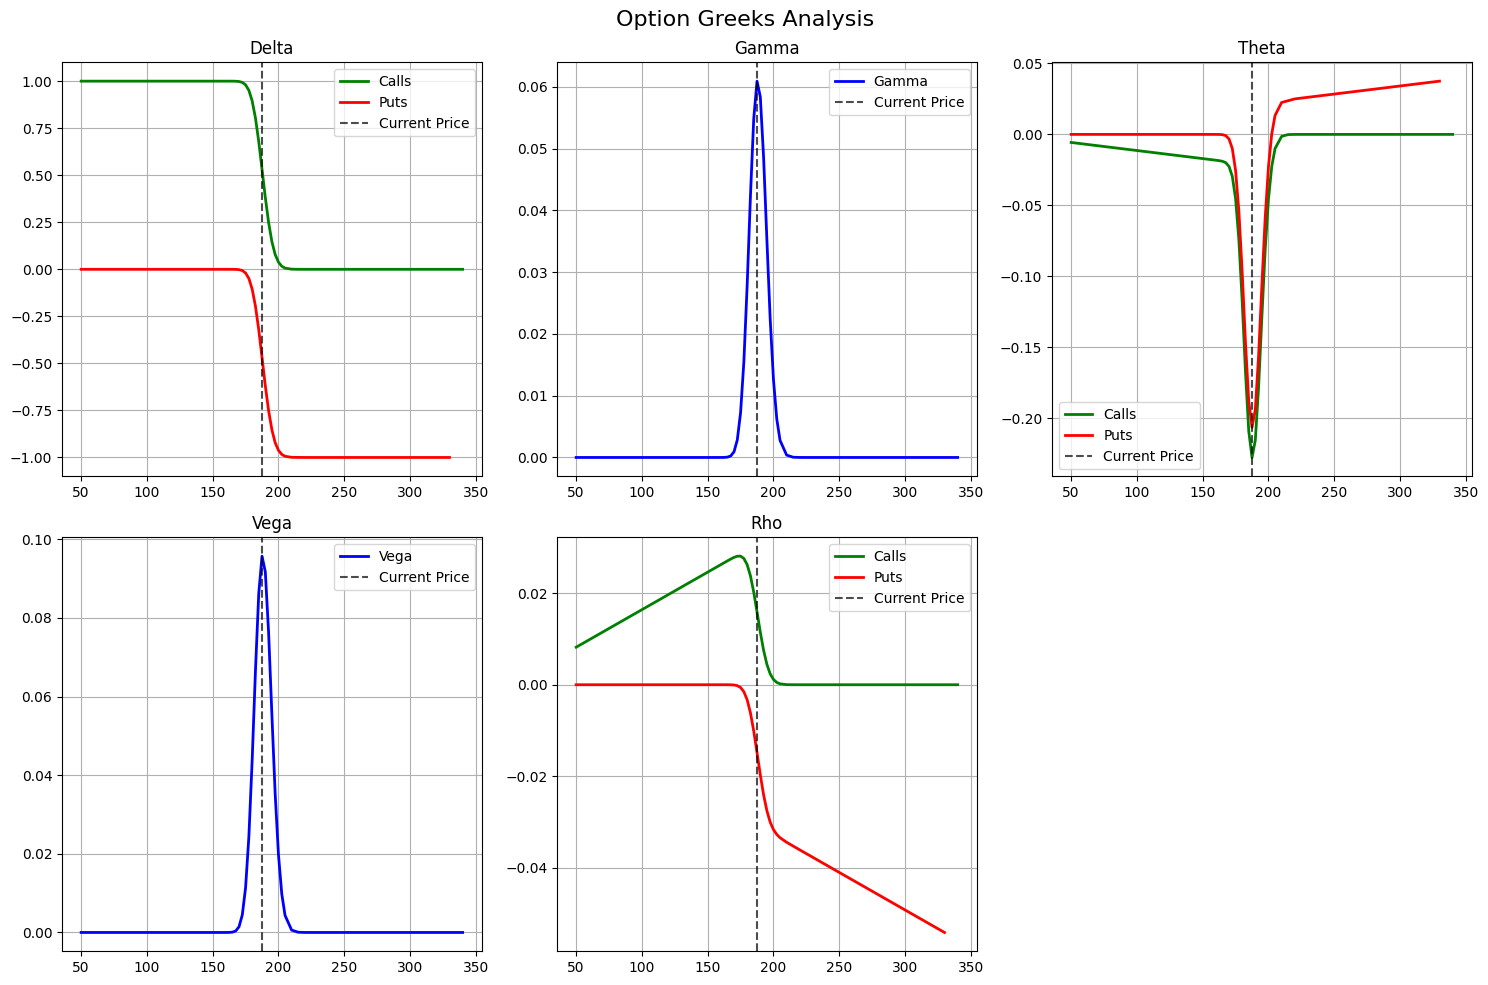

In [44]:
import matplotlib.pyplot as plt

def plot_greeks(greeks_data, current_price):
    """Plot option Greeks"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Option Greeks Analysis', fontsize=16)
    
    # Separate calls and puts
    calls = greeks_data[greeks_data['Type'] == 'Call']
    puts = greeks_data[greeks_data['Type'] == 'Put']
    
    # Delta
    axes[0,0].plot(calls['strike'], calls['delta'], 'g-', label='Calls', linewidth=2)
    axes[0,0].plot(puts['strike'], puts['delta'], 'r-', label='Puts', linewidth=2)
    axes[0,0].axvline(x=current_price, color='k', linestyle='--', alpha=0.7, label='Current Price')
    axes[0,0].set_title('Delta')
    axes[0,0].legend()
    axes[0,0].grid(True)
    
    # Gamma
    axes[0,1].plot(calls['strike'], calls['gamma'], 'b-', label='Gamma', linewidth=2)
    axes[0,1].axvline(x=current_price, color='k', linestyle='--', alpha=0.7, label='Current Price')
    axes[0,1].set_title('Gamma')
    axes[0,1].legend()
    axes[0,1].grid(True)
    
    # Theta
    axes[0,2].plot(calls['strike'], calls['theta'], 'g-', label='Calls', linewidth=2)
    axes[0,2].plot(puts['strike'], puts['theta'], 'r-', label='Puts', linewidth=2)
    axes[0,2].axvline(x=current_price, color='k', linestyle='--', alpha=0.7, label='Current Price')
    axes[0,2].set_title('Theta')
    axes[0,2].legend()
    axes[0,2].grid(True)
    
    # Vega
    axes[1,0].plot(calls['strike'], calls['vega'], 'b-', label='Vega', linewidth=2)
    axes[1,0].axvline(x=current_price, color='k', linestyle='--', alpha=0.7, label='Current Price')
    axes[1,0].set_title('Vega')
    axes[1,0].legend()
    axes[1,0].grid(True)
    
    # Rho
    axes[1,1].plot(calls['strike'], calls['rho'], 'g-', label='Calls', linewidth=2)
    axes[1,1].plot(puts['strike'], puts['rho'], 'r-', label='Puts', linewidth=2)
    axes[1,1].axvline(x=current_price, color='k', linestyle='--', alpha=0.7, label='Current Price')
    axes[1,1].set_title('Rho')
    axes[1,1].legend()
    axes[1,1].grid(True)
    
    # Hide empty subplot
    axes[1,2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot the Greeks
plot_greeks(greeks_data, current_price)